# CONTENT LIST

1. Importing Libraries
2. Importing Data
3. Correlation Heatmaps
4. Scatterplots
5. Pair Plots
6. Categorical Plots
7. Questions & Hypotheses

# 01. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# 02. Importing Data

In [2]:
#Create Path
path = r'C:\Users\chery\Desktop\CareerFoundry\Immersion Data Analytics\Achievement 6\04-2021 PPP Loan Analysis\02 Data'

In [3]:
#Importing data sets

df_industry = pd.read_pickle(os.path.join(path, 'Prepared Data', 'industry_cleaned.pkl'))
df_ppp = pd.read_pickle(os.path.join(path, 'Prepared Data', 'ppp_cleaned.pkl'))
df_zip = pd.read_pickle(os.path.join(path, 'Prepared Data', 'zip_cleaned.pkl'))

# 03. Correlations Heatmap

## ZIP DF

In [5]:
df_zip.columns

Index(['ZIP', 'COUNTY', 'RESIDENTIAL_RATIO', 'BUSINESS_RATIO', 'OTHER_RATIO',
       'TOTAL_RATIO'],
      dtype='object')

In [4]:
# Create a subset with only quantitative columns

zip_sub = df_zip[['RESIDENTIAL_RATIO', 'BUSINESS_RATIO', 'OTHER_RATIO', 'TOTAL_RATIO']]

In [7]:
zip_sub

,RESIDENTIAL_RATIO,BUSINESS_RATIO,OTHER_RATIO,TOTAL_RATIO
0,0.000000,1.000000,0.000000,1.000000
1,0.839799,0.800983,0.871166,0.838115
2,0.160201,0.199017,0.128834,0.161885
3,1.000000,0.998801,1.000000,0.999919
4,0.000000,0.001199,0.000000,0.000081
...,...,...,...,...
54189,0.000000,0.000000,1.000000,1.000000
54190,0.000000,0.000000,1.000000,1.000000
54191,0.000000,0.000000,1.000000,1.000000
54192,0.000000,0.000000,1.000000,1.000000


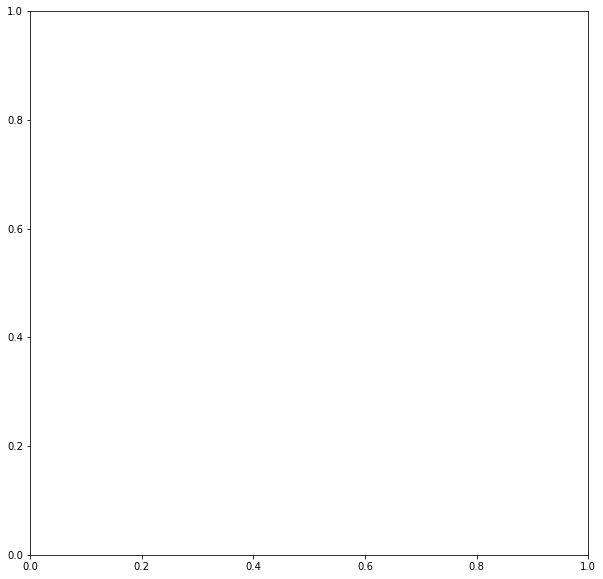

In [8]:
# Create a subplot with matplotlib to show the subplots.

f,ax = plt.subplots(figsize=(10,10))

In [9]:
# Create correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(zip_sub.corr(), annot = True, ax = ax) 

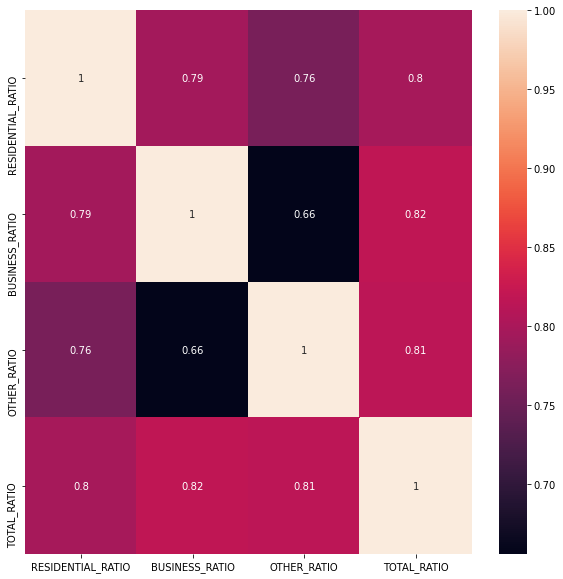

In [10]:
corr.figure

For 'Business_Ratio':

With “Residential_Ratio”: A 0.79 coefficient indicates a strong positive correlation, which makes sense — the more residential homes in the area, the more businesses.

With “Other_Ratio”: A 0.66 coefficient indicates a strong positive correlation, which makes sense — the more 'other' (non-residential & non-business) addresses in the area, the more businesses.

With “Total_Ratio”: A 0.82 coefficient indicates a strong positive correlation, which makes sense — the more total addresses in the area, the more businesses. It makes logical sense that this ratio would be the highest as it is combining 'residential', 'other' and 'business' ratios.

## PPP DF

In [11]:
df_ppp.columns

Index(['loan_amount', 'city', 'state', 'zip', 'industry_code', 'business_type',
       'business_owner_race', 'business_owner_gender',
       'business_owner_vet_status', 'jobs_reported', 'date_loan_approved',
       'lender', 'congressional_district'],
      dtype='object')

In [5]:
# Create a subset with only quantitative columns

ppp_sub = df_ppp[['loan_amount', 'jobs_reported']]

In [13]:
ppp_sub

,loan_amount,jobs_reported
0,149978.0,17.0
1,149900.0,39.0
2,149887.0,14.0
3,149865.0,0.0
4,149862.0,19.0
...,...,...
4549608,400.0,2.0
4549609,390.0,1.0
4549610,377.3,1.0
4549611,330.0,1.0


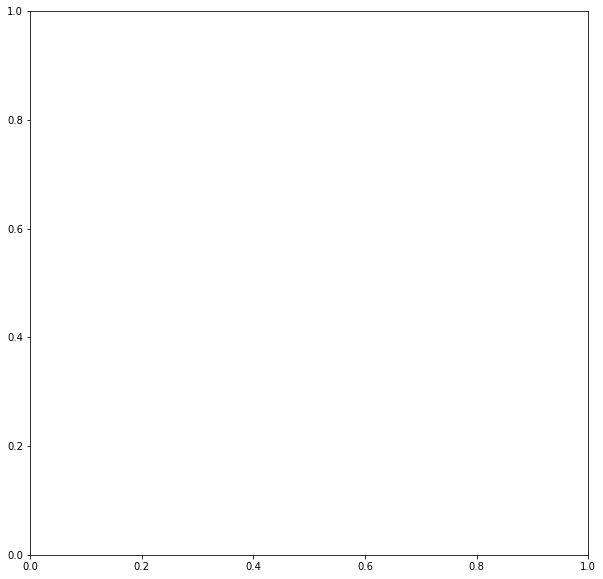

In [14]:
# Create a subplot with matplotlib to show the subplots.

f,ax = plt.subplots(figsize=(10,10))

In [15]:
# Create correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(ppp_sub.corr(), annot = True, ax = ax) 

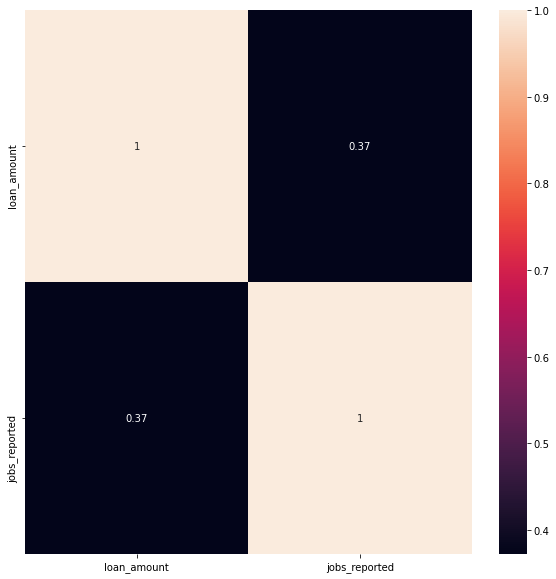

In [16]:
corr.figure

For 'loan_amount':

With “jobs_reported”: A 0.37 coefficient indicates a moderate positive correlation, which makes sense — the larger loan amount, the more jobs reporeted.

# 04. Scatterplots

## ZIP DF

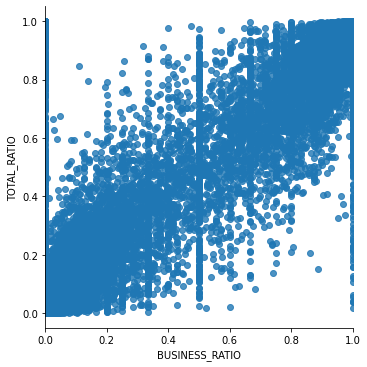

In [17]:
# Create a scatterplot for the "BUSINESS_RATIO" and "TOTAL_RATIO" columns in seaborn

sns.lmplot(x = 'BUSINESS_RATIO', y = 'TOTAL_RATIO', data = df_zip)

Overall there is a moderately strong, linear trend supporting the strong, positive correlation. While there are outlier values, the majority of data points fall close to the trend line further supporting the relationship between these two variables. 

## PPP DF

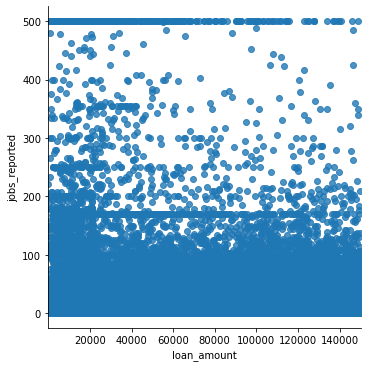

In [7]:
# Create a scatterplot for the "loan_amount" and "jobs_reported" columns in seaborn

sns.lmplot(x = 'loan_amount', y = 'jobs_reported', data = ppp_sub)

There doesn't appear to be any linear trend between variables meaning that the earlier found coefficient is not enough to produce a holistic view of the relationship between these two variables. The scatterplot does show that the majority of jobs reported is 200 or less.

# 05. Pair Plots

## ZIP DF

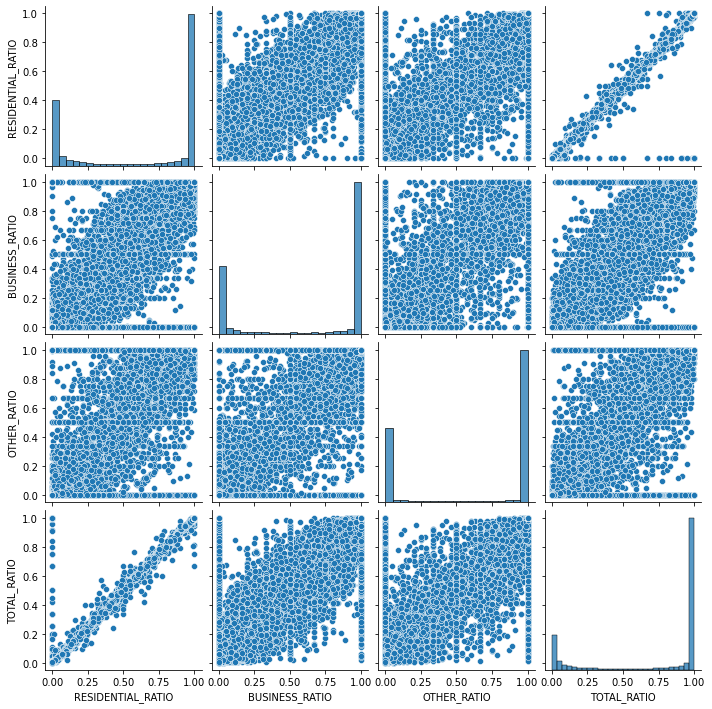

In [58]:
# Create a pair plot 

g = sns.pairplot(zip_sub)

Residential vs Total ratio appear to have the strongest & most positive relationship out of all variables.

Business vs. Residential  +  Business vs. Other appear to have a moderately strong, positive relationship; however, there is such a large variance of data.


*With Total ratio being the variable with the strongest relationship to Business Ratio I want to further investigate these variables. (Focusing on Business ratio due to the fact that the project focusing on small businesses loans)

## PPP DF

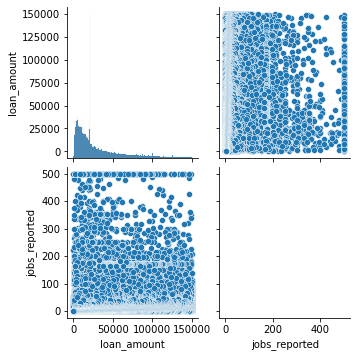

In [59]:
# Create a pair plot 

g = sns.pairplot(ppp_sub)

Same observations as noted earlier: There doesn't appear to be any linear trend between variables meaning that the earlier found coefficient is not enough to produce a holistic view of the relationship between these two variables.

# 06. Categorical Plots

## ZIP DF

<AxesSubplot:xlabel='TOTAL_RATIO', ylabel='Count'>

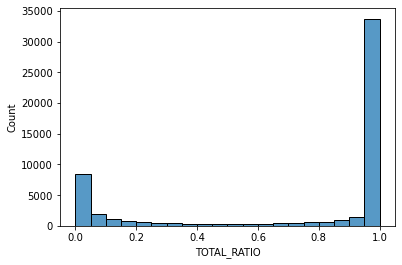

In [8]:
# Histogram to visualize distribution of variables to then determine categories for Total Ratio ranges.

sns.histplot(zip_sub['TOTAL_RATIO'], bins = 20)

In [6]:
#Create small ratio category

zip_sub.loc[zip_sub['TOTAL_RATIO'] < 0.33, 'Ratio Category'] = 'Small Ratio'

C:\Users\chery\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\chery\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [7]:
#Create medium ratio category

zip_sub.loc[(zip_sub['TOTAL_RATIO'] >= 0.33) & (zip_sub['TOTAL_RATIO'] < 0.66), 'Ratio Category'] = 'Medium Ratio'

C:\Users\chery\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [8]:
#Create large ratio category

zip_sub.loc[zip_sub['TOTAL_RATIO'] >= 0.66, 'Ratio Category'] = 'Large Ratio'

C:\Users\chery\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [12]:
#View count of values in each category

zip_sub['Ratio Category'].value_counts(dropna = False)

Large Ratio     38292
Small Ratio     13724
Medium Ratio     2178
Name: Ratio Category, dtype: int64

In [ ]:
#Create categorical plot in seaborn using the ratio categories created above

sns.set(style="ticks")
g = sns.catplot(x="TOTAL_RATIO", y="BUSINESS_RATIO", hue="Ratio Category", data = zip_sub)

## PPP DF

<AxesSubplot:xlabel='loan_amount', ylabel='Count'>

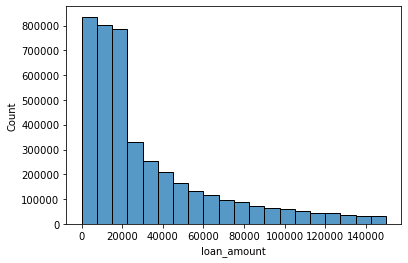

In [61]:
# Histogram to visualize distribution of variables to then determine categories for loan amount ranges.

sns.histplot(ppp_sub['loan_amount'], bins = 20)

In [11]:
#Create small loan category

ppp_sub.loc[ppp_sub['loan_amount'] < 30000, 'Loan Category'] = 'Small Loan'

C:\Users\chery\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\chery\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [12]:
#Create medium loan category

ppp_sub.loc[(ppp_sub['loan_amount'] >= 30000) & (ppp_sub['loan_amount'] < 60000), 'Loan Category'] = 'Medium Loan'

C:\Users\chery\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [13]:
#Create large loan category

ppp_sub.loc[ppp_sub['loan_amount'] >= 60000, 'Loan Category'] = 'Large Loan'

C:\Users\chery\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [14]:
#View count of values in each category

ppp_sub['Loan Category'].value_counts(dropna = False)

Small Loan     2750222
Medium Loan     757390
Large Loan      734124
Name: Loan Category, dtype: int64

KeyboardInterrupt: 

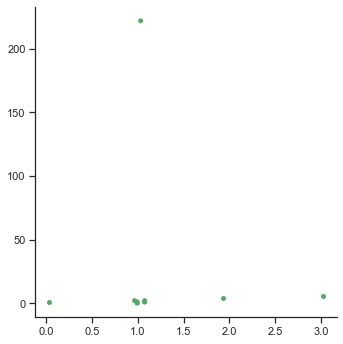

In [15]:
#Create categorical plot in seaborn using the loan categories created above

sns.set(style="ticks")
g = sns.catplot(x="loan_amount", y="jobs_reported", hue="Loan Category", data=ppp_sub)

# 07. Questions & Hypotheses

## Questions

Questions from Previous Exercise) Cannot be addressed yet with these types of visualizations/analyses.

New Question 1) Did zipcodes with a higher total ratio receive more loans compared to zipcodes with lower residential ratios?

New Question 2) With only a moderate, positive correlation & no linear trend between 'loan_amount' & 'jobs_reported', is there another variable that affects the number of 'jobs_reported'?

## Hypotheses

**'A higher loan amount results in a larger number of jobs reported.'** 

(I will most likely tweak this hypothesis once/if I discover another variable that has a great impact on the number of jobs reported)